## Lab | Random Forests

In [76]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score, recall_score, cohen_kappa_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load datasets
numerical = pd.read_csv('files_for_lab/numerical.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
targets = pd.read_csv('files_for_lab/target.csv')

In [3]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [4]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [5]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [8]:
#As there are 315 numerical columns we can select the best features.
#First scale the data
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns = numerical.columns)
numerical_scaled_df.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,...,0.341463,0.005,0.001401,0.010,0.003676,0.006465,0.498045,0.0,1.000000,0.622951
1,0.000014,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,0.555556,0.111111,0.060606,...,0.024390,0.010,0.004004,0.025,0.016544,0.014399,0.774510,0.0,0.333333,0.000000
2,0.000014,0.624862,0.333333,0.111111,0.008299,0.000000,0.202020,0.292929,0.333333,0.060606,...,0.341463,0.002,0.002202,0.005,0.011029,0.006204,0.078617,1.0,1.000000,0.967213
3,0.000000,0.711340,0.000000,0.444444,0.008299,0.000000,0.232323,0.141414,0.313131,0.030303,...,0.170732,0.002,0.001201,0.010,0.008272,0.005534,0.899764,1.0,1.000000,0.655738
4,0.000000,0.793814,0.333333,0.222222,0.248963,0.010101,0.282828,0.090909,0.535354,0.262626,...,0.195122,0.003,0.002002,0.015,0.012868,0.005586,0.037079,1.0,0.333333,0.409836


In [12]:
X = numerical_scaled_df
y = targets['TARGET_B']

# We use chi2 because we will try to predict "TARGET_B" which is a categorical feature (classification task).
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k=10) # Here we choose 10 best features so that is easier to analyze results later
kbest.fit(X,y)
X_new = kbest.transform(X) 
selected_num_columns = [X.columns[index] for index, value in enumerate(kbest.get_support().tolist()) if value == True]
selected_num = pd.DataFrame(X_new, columns = selected_num_columns)
selected_num.head()

,ETH2,HVP1,HVP2,HVP3,HVP4,HVP6,RP1,RP2,CARDGIFT,RFA_2F
0,0.010101,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.050505,0.341463,1.000000
1,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.919192,0.024390,0.333333
2,0.020202,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.020202,0.341463,1.000000
3,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.080808,0.170732,1.000000
4,0.989899,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.585859,0.195122,0.333333


In [10]:
#Check class imbalance
targets['TARGET_B'].value_counts(dropna=False)

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [11]:
#Upscale using SMOTE method
#Encode the categorical columns first
cat_encoded = pd.get_dummies(categorical, drop_first=True)
cat_encoded

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,36,3,2,89,1,37,12,92,8,94,...,1,0,0,0,1,0,0,0,1,0
1,14,3,1,94,1,52,2,93,10,95,...,0,0,1,0,0,0,0,1,0,0
2,43,3,2,90,1,0,2,91,11,92,...,1,0,0,0,1,0,1,0,0,0
3,44,3,2,87,1,28,1,87,11,94,...,1,0,0,0,1,0,1,0,0,0
4,16,3,2,86,1,20,1,93,10,96,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,27,3,2,96,1,0,2,96,2,96,...,0,0,1,0,1,0,0,0,0,0
95408,24,3,1,96,1,50,1,96,3,96,...,0,1,0,0,0,0,0,0,0,0
95409,30,3,3,95,1,38,1,96,3,95,...,1,0,0,1,0,0,0,0,0,0
95410,24,2,1,86,1,40,5,90,11,96,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#Create X, y split
X = pd.concat([selected_num, cat_encoded], axis=1)
X

,ETH2,HVP1,HVP2,HVP3,HVP4,HVP6,RP1,RP2,CARDGIFT,RFA_2F,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.010101,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.050505,0.341463,1.000000,...,1,0,0,0,1,0,0,0,1,0
1,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.919192,0.024390,0.333333,...,0,0,1,0,0,0,0,1,0,0
2,0.020202,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.020202,0.341463,1.000000,...,1,0,0,0,1,0,1,0,0,0
3,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.080808,0.170732,1.000000,...,1,0,0,0,1,0,1,0,0,0
4,0.989899,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.585859,0.195122,0.333333,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.101010,0.020202,0.101010,0.494949,0.737374,0.000000,0.696970,0.848485,0.000000,0.000000,...,0,0,1,0,1,0,0,0,0,0
95408,0.030303,0.181818,0.717172,0.888889,0.919192,0.050505,0.161616,0.262626,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,0
95409,0.141414,0.000000,0.000000,0.000000,0.010101,0.000000,0.030303,0.343434,0.097561,0.666667,...,1,0,0,1,0,0,0,0,0,0
95410,0.010101,0.898990,0.969697,1.000000,1.000000,0.090909,0.888889,0.888889,0.439024,1.000000,...,0,1,0,0,0,0,0,0,0,0


In [14]:
y = targets['TARGET_B']
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#Only apply SMOTE on the train set
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [17]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(76329, 49)
(144972, 49)


In [18]:
y_train_SMOTE.value_counts()

0    72486
1    72486
Name: TARGET_B, dtype: int64

In [19]:
#Apply random forest
from sklearn.ensemble import RandomForestClassifier

In [73]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf =10,
                             max_samples=0.8,
                             random_state = 0)
clf.fit(X_train_SMOTE, y_train_SMOTE)


RandomForestClassifier(max_depth=5, max_samples=0.8, min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [74]:
print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE, y_train_SMOTE)))
print("The Accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

The Accuracy for the Random Forest in the TRAIN set is 0.84
The Accuracy for the Random Forest in the TEST set is 0.80


Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?

In [22]:
y_pred = clf.predict(X_test)
display(y_test.value_counts())

0    18083
1     1000
Name: TARGET_B, dtype: int64

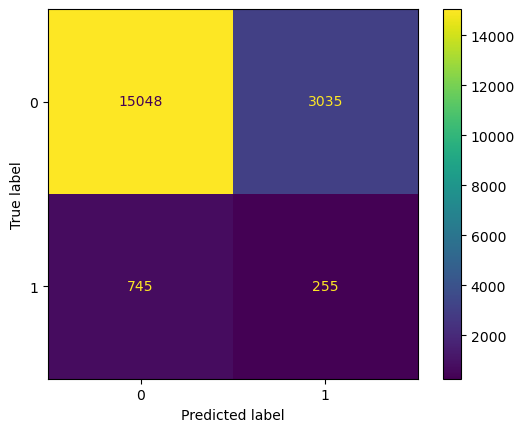

In [23]:
#Plot confusion matrix
cm_test = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

In this case it would be worse for the company to predict a false positive (predict someone donates but they don't). Predicting a false negative (predict someone does not donate but they do) will not cause a loss as the person is already donating. 

Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metrics of interest in this case.

In [89]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

max_depth_choices= [3,None] # A list of the possible values of max_depth to try
criterion_choices = ['gini','entropy'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,5] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,5] # A list of the possible values of min_samples_leaf to try    

In [57]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [68]:
model = clf

In [69]:
#With accuracy score
scorer1 = make_scorer(accuracy_score)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose=1, scoring=scorer1, n_jobs=-1)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_samples=0.8,
                                              min_samples_leaf=20,
                                              min_samples_split=20,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=1)

In [60]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [62]:
print("The best Accuracy for the best hyperparameters is {:.2f}".format(grid_search.best_score_))

The best Accuracy for the best hyperparameters is 0.97


In [70]:
#Try with recall scorer
scorer2 = make_scorer(recall_score)
grid_search2 = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose=1, scoring=scorer2, n_jobs=-1)
grid_search2.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_samples=0.8,
                                              min_samples_leaf=20,
                                              min_samples_split=20,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(recall_score), verbose=1)

In [72]:
grid_search2.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [71]:
print("The best Recall for the best hyperparameters is {:.2f}".format(grid_search2.best_score_))

The best Recall for the best hyperparameters is 0.95


In [77]:
#Check with Kappa score
scorer3= make_scorer(cohen_kappa_score)
grid_search3 = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose=1, scoring=scorer3, n_jobs=-1)
grid_search3.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_samples=0.8,
                                              min_samples_leaf=20,
                                              min_samples_split=20,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(cohen_kappa_score), verbose=1)

In [79]:
grid_search3.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [81]:
print("The best Kappa for the best hyperparameters is {:.2f}".format(grid_search3.best_score_))

The best Kappa for the best hyperparameters is 0.94


In [ ]:
#Check with F1-Score score

In [85]:
scorer4= make_scorer(f1_score)
grid_search4 = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose=1, scoring=scorer4, n_jobs=-1)
grid_search4.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_samples=0.8,
                                              min_samples_leaf=20,
                                              min_samples_split=20,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(f1_score), verbose=1)

In [86]:
grid_search4.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [87]:
print("The best F1_score for the best hyperparameters is {:.2f}".format(grid_search4.best_score_))

The best F1_score for the best hyperparameters is 0.97
